For reference on LaTeX: https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

# Chapter 5: Prisoners of the Dilemma

## 5.3 Reactive Strategies
### 5.3.1 "In Silico" Evolution

On page 84

Let us perform an experiment to understand the evolutionary dynamics of reactive strategies. Use a random number generator that returns a uniform distribution on [0,1] to produce n=100 reactive strategies. Let us use the same payoff values that Axelrod chose for his two tournaments: R=3, T=5, S=0, and P=1. Calcuate the $n\times n$ payoff matrix using equation (5.17, given below). Insert the matrix, $A=(a_{ij})$, into the replicator equation.

$$ E(S_1,S_2) = Rs_1s_2 + Ss_1(1-s_2) + T(1-s_1)s_2 + P(1-s_1)(1-s_2) $$

The replicator equation is in Figure 4.5 (page 56):

$$ \dot{x_i} = x_i[f_i(\vec{x}) - \phi(\vec{x})] $$
, where 
$$ \phi(\vec{x}) = \sum_i f_i(\vec{x})x_i $$

$$ f_i(\vec{x}) = \sum_{j=1}^n a_{ij}x_j = A\vec{x}$$

$$ \vec{x} = (x_1, x_2, ..., x_n)$$

Show the evolution of the above procedure with computer simulation
- Reference: Nowak, M. A. & K. Sigmund (1992). Tit for tat in heterogeneous populations. Nature 355: 250-253. DOI: 10.1038/355250a0  [PDF](https://ped.fas.harvard.edu/files/ped/files/nature92b_0.pdf)

In [1]:
%matplotlib inline

import numpy as np
np.set_printoptions(precision=3, suppress=True)

import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint  # Ordinary Differential Equation


In [2]:
# create payoff matrix

R, S, T, P = 3, 0, 5, 1 # Reward, Suck, Temptation, Punishment

M = 10
N = M*M # total strategies in total

proba_list = np.linspace(0.00001, .99999, M)
print(proba_list)

debug = 0
# debug = 1

def payoff(p1, q1, p2, q2): # payoff of two strategies (p1, q1) vs (p2, q2)
    r1 = p1-q1
    if abs(r1)==1:
        p1 -= r1*0.0001
        r1 = p1-q1
    r2 = p2-q2
    if abs(r2)==1:
        p2 -= r2*0.0001
        r2 = p2-q2

    s1 = (q2*r1 + q1) / (1-r1*r2)
    s2 = (q1*r2 + q2) / (1-r1*r2)
    v1 = s1*s2
    v2 = s1*(1-s2)
    v3 = (1-s1)*s2
    v4 = (1-s1)*(1-s2)
    result = R*v1 + S*v2 + T*v3 + P*v4
    if debug == 2:
        print(p1, q1, p2, q2, r1, r2, s1, s2, v1, v2, v3, v4, result)
    return result


def compute_payoff_between_i_and_j(i, j): # both i and j are in the range of (0, 1, ...,99)
    i_row = int(i/M)
    i_col = i%M
    p1 = proba_list[i_row]
    q1 = proba_list[i_col]
    j_row = int(j/M)
    j_col = j%M
    p2 = proba_list[j_row]
    q2 = proba_list[j_col]
    
    expected_payoff = payoff(p1, q1, p2, q2)
    
    if debug:
        print(f'[i={i:02d}] ({i_row}, {i_col}) ({p1:.3f}, {q1:.3f}) vs. [j={j:02d}] ({j_row}, {j_col}) ({p2:.3f}, {q2:.3f})  payoff: {expected_payoff:.2f}' )
    return expected_payoff
    
    
payoff_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        payoff_matrix[i, j] = compute_payoff_between_i_and_j(i, j)    

[0.    0.111 0.222 0.333 0.444 0.556 0.667 0.778 0.889 1.   ]


In [3]:
# inspection = 0 # ALLD
# inspection = N-1 # ALLC
# inspection = N-M # TFT. Payoff is different from what I expected - initial action is not considered?

if M==3:
    np.set_printoptions(precision=2, suppress=True)
    display(pd.DataFrame(payoff_matrix))

max freq: 0.99    min freq: -0.00
x_hist.shape = (99, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,0.05,0.05,0.04,0.03,0.02,0.02,0.01,0.01,0.01,0.00,...,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.12,0.08,0.05,0.03,0.02,0.01,0.01,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.18,0.10,0.05,0.03,0.01,0.01,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.23,0.11,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.27,0.10,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.31,0.10,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.34,0.09,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.36,0.08,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.38,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


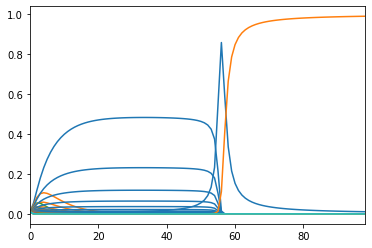

In [4]:
def f(x, t):
    payoff_vector = payoff_matrix.dot(x)
    phi = x.dot(payoff_vector)
#     print(f'{phi:.1f}', end=' ')
    dx = x*(payoff_vector - phi)
    return dx

stop, cnt = 3*N, N-1
if N<=30:
    stop, cnt = 300, 99
t = np.linspace(0, stop, cnt)
x_init = np.ones(N)/N

x_hist = odeint(f, x_init, t)

print(f'max freq: {x_hist.max():.2f}    min freq: {x_hist.min():.2f}')
print('x_hist.shape =', x_hist.shape)


df = pd.DataFrame(x_hist[:, :])
df.plot(legend=False)

pd.DataFrame(x_hist).round(2)[:10]

P [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.111 0.111
 0.111 0.111 0.111 0.111 0.111 0.111 0.111 0.111]
Q [0.    0.111 0.222 0.333 0.444 0.556 0.667 0.778 0.889 1.    0.    0.111
 0.222 0.333 0.444 0.556 0.667 0.778 0.889 1.   ]


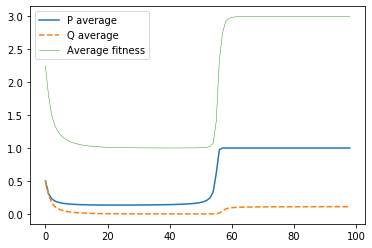

In [5]:
proba_list_P = np.repeat(proba_list, M)
proba_list_Q = np.tile(proba_list, M)
print('P', proba_list_P[:20])
print('Q', proba_list_Q[:20])

P = [proba_list_P.dot(x_hist[i,:]) for i in range(len(x_hist))]
Q = [proba_list_Q.dot(x_hist[i,:]) for i in range(len(x_hist))]
plt.plot(P, '-')
plt.plot(Q, '--')

fitness = [x_hist[i,:].dot(payoff_matrix.dot(x_hist[i,:])) for i in range(len(x_hist))]
plt.plot(fitness, linewidth=0.5)

plt.legend(['P average', 'Q average', 'Average fitness'])

x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y: [0.    0.111 0.222 0.333 0.444 0.556 0.667 0.778 0.889 1.   ]


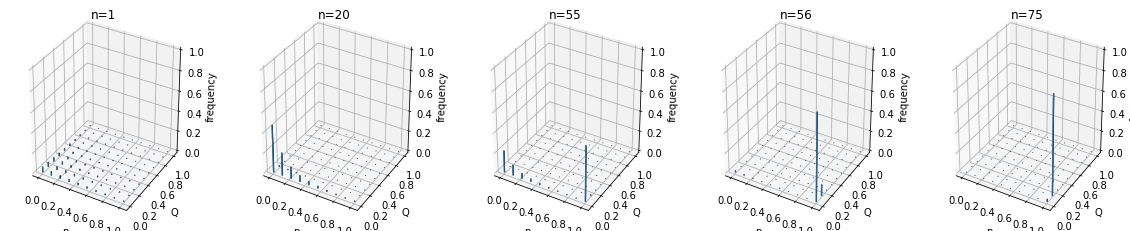

In [6]:
from mpl_toolkits.mplot3d import Axes3D 

x = y = np.linspace(0, 1, M)
x_, y_ = np.meshgrid(x, y)
x, y = x_.ravel(), y_.ravel()

x, y = y, x # this is because meshgrid and my treatment of index are orthogonal
print('x:', x[:10])
print('y:', y[:10])

fig = plt.figure(figsize=(20, 4))

n_list = (1, 5, 10, 20)
if M==10:
    n_list = (1, 20, 55, 56, 75)
if M==15:
    n_list = (10, 200, 330, 342, 490)
if M==3:
    n_list = (1, 5, 10, 20)

for i in range(len(n_list)):
    n = n_list[i]
    z = x_hist[n, :]
    
    ax = fig.add_subplot(1, len(n_list), i+1, projection='3d')
    bottom = np.zeros_like(x)
    width = depth = .01
    ax.bar3d(x, y, bottom, width, depth, z)
    ax.set_xlabel('p')
    ax.set_ylabel('Q')
    ax.set_zlabel('frequency')
    plt.title(f'n={n}')
    ax.set_zlim(0, 1)